## Quebec City Airbnb 12/22

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import math 

In [2]:
# #Loading data
qc = pd.read_csv("data/qcab1222.csv")

In [ ]:
# #Summary
#print("Rows:",qc.shape[0])
#print("Columns:",qc.shape[1])
#print("\nFeatures:\n",qc.columns.tolist())
#print("\nMissing Value:",qc.isnull().sum().sum())
#print("\nColumns with missing value:\n",qc.isnull().any())

In [3]:
qc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2543 non-null   int64  
 1   name                            2543 non-null   object 
 2   host_id                         2543 non-null   int64  
 3   host_name                       2543 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2543 non-null   object 
 6   latitude                        2543 non-null   float64
 7   longitude                       2543 non-null   float64
 8   room_type                       2543 non-null   object 
 9   price                           2543 non-null   int64  
 10  minimum_nights                  2543 non-null   int64  
 11  number_of_reviews               2543 non-null   int64  
 12  last_review                     21

In [4]:
qc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
# #Drop unnecessary columns
qc.drop(['id', 'name','host_id','host_name','last_review', 'neighbourhood_group', 'calculated_host_listings_count','number_of_reviews', 'reviews_per_month','number_of_reviews_ltm','license'], axis=1, inplace=True)
# Render first 5 rows
qc.head()

neighbourhood  latitude  longitude  \
0                                       Sillery  46.76843  -71.26636   
1                                    Saint-Roch  46.81169  -71.22522   
2  Vieux-Québec/Cap-Blanc/Colline parlementaire  46.80286  -71.21271   
3  Vieux-Québec/Cap-Blanc/Colline parlementaire  46.81023  -71.21082   
4                                  Vieux-Moulin  46.85134  -71.21403   

         room_type  price  minimum_nights  availability_365  
0     Private room    145               2               339  
1  Entire home/apt    150              30               184  
2     Private room     93               3                63  
3  Entire home/apt     40              30                 0  
4  Entire home/apt     89               3                70

In [6]:
qc.describe()

latitude    longitude         price  minimum_nights  \
count  2543.000000  2543.000000   2543.000000     2543.000000   
mean     46.819101   -71.239407    213.243807       10.868659   
std       0.027622     0.042735   2024.787033       46.546772   
min      46.736920   -71.455640     15.000000        1.000000   
25%      46.809535   -71.243467     73.000000        1.000000   
50%      46.813530   -71.226130    114.000000        2.000000   
75%      46.823940   -71.217720    182.000000        4.000000   
max      46.957711   -71.151620  94102.000000     1000.000000   

       availability_365  
count       2543.000000  
mean         178.955171  
std          136.465757  
min            0.000000  
25%           38.000000  
50%          172.000000  
75%          326.000000  
max          365.000000

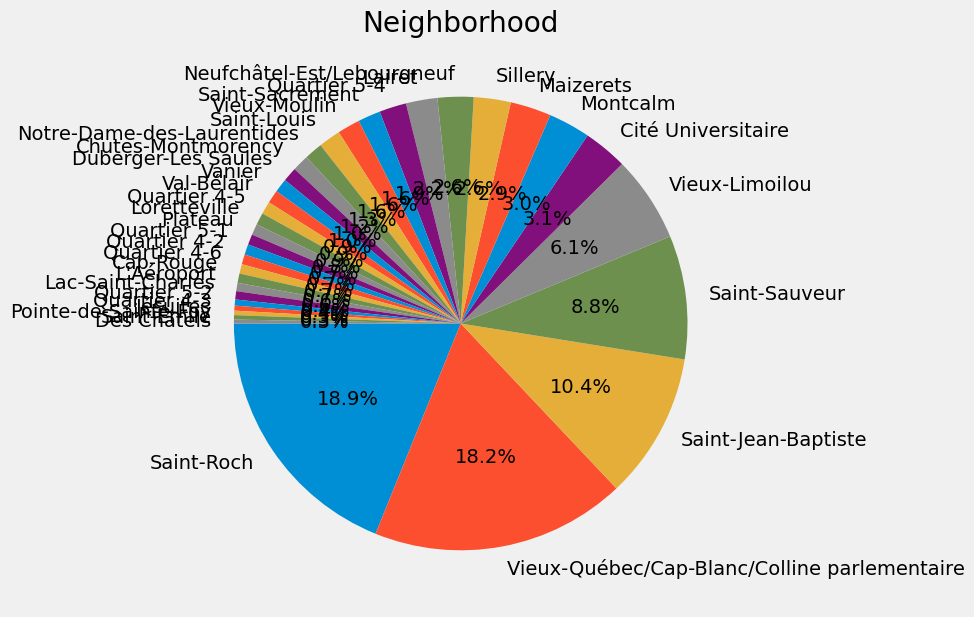

In [7]:
# #Neighbourhood
plt.style.use('fivethirtyeight')
plt.figure(figsize=(28,7))
plt.title("Neighborhood")
g = plt.pie(qc.neighbourhood.value_counts(), labels=qc.neighbourhood.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

/Users/vmcolon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


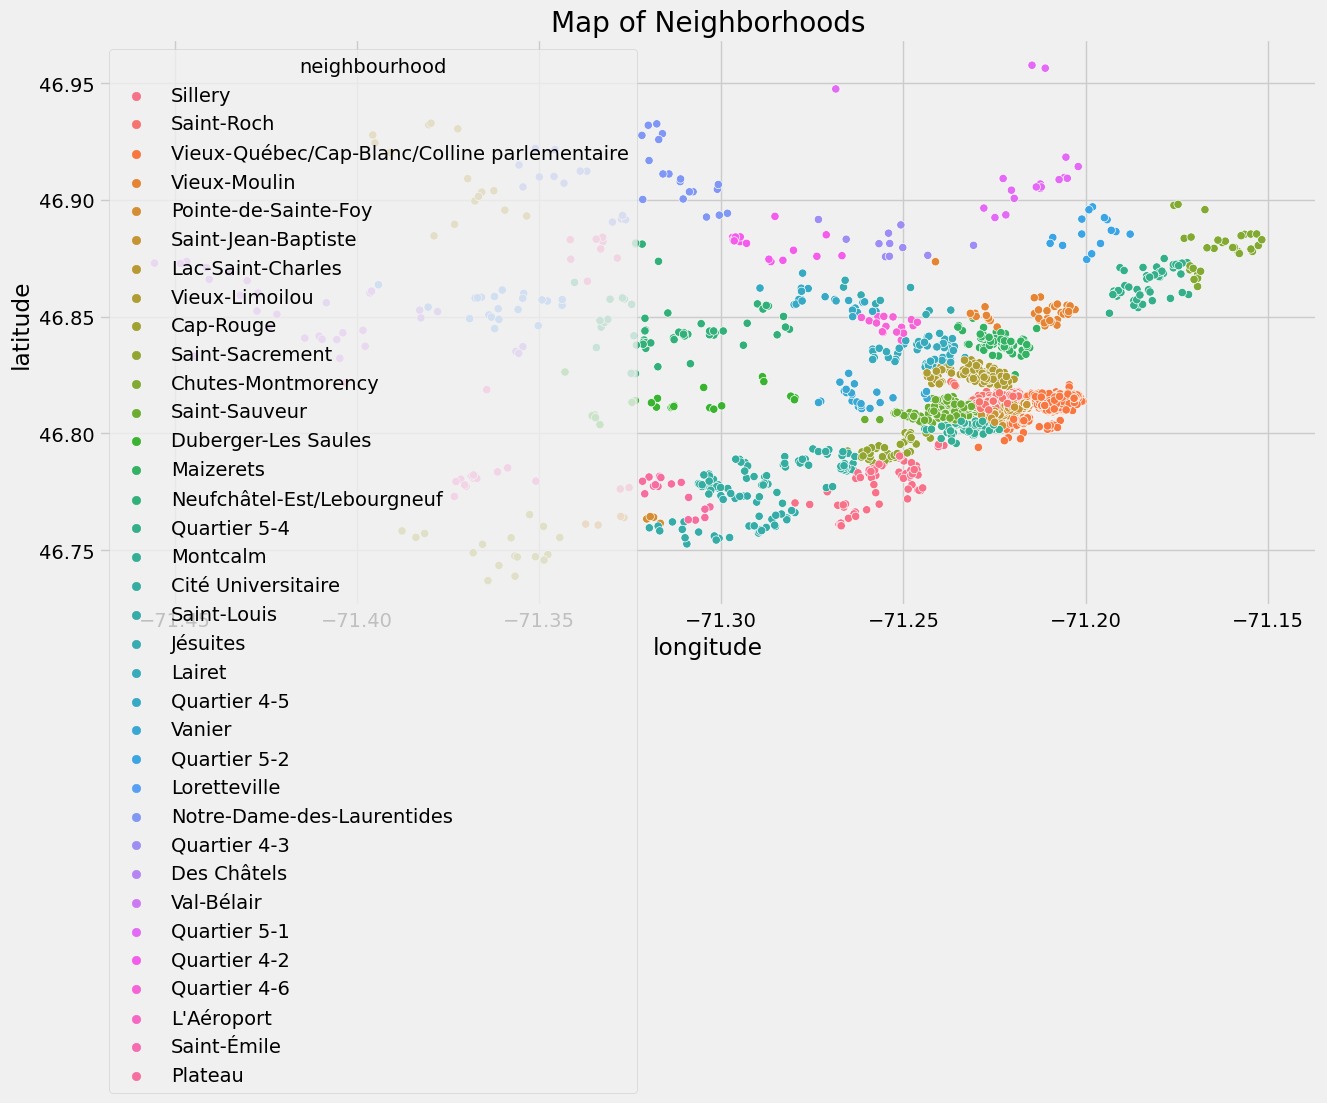

In [8]:
# #Map of neighborhoods
plt.figure(figsize=(14,7))
plt.title("Map of Neighborhoods")
sns.scatterplot(qc.longitude,qc.latitude,hue=qc.neighbourhood)
plt.ioff()
plt.show()

/Users/vmcolon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


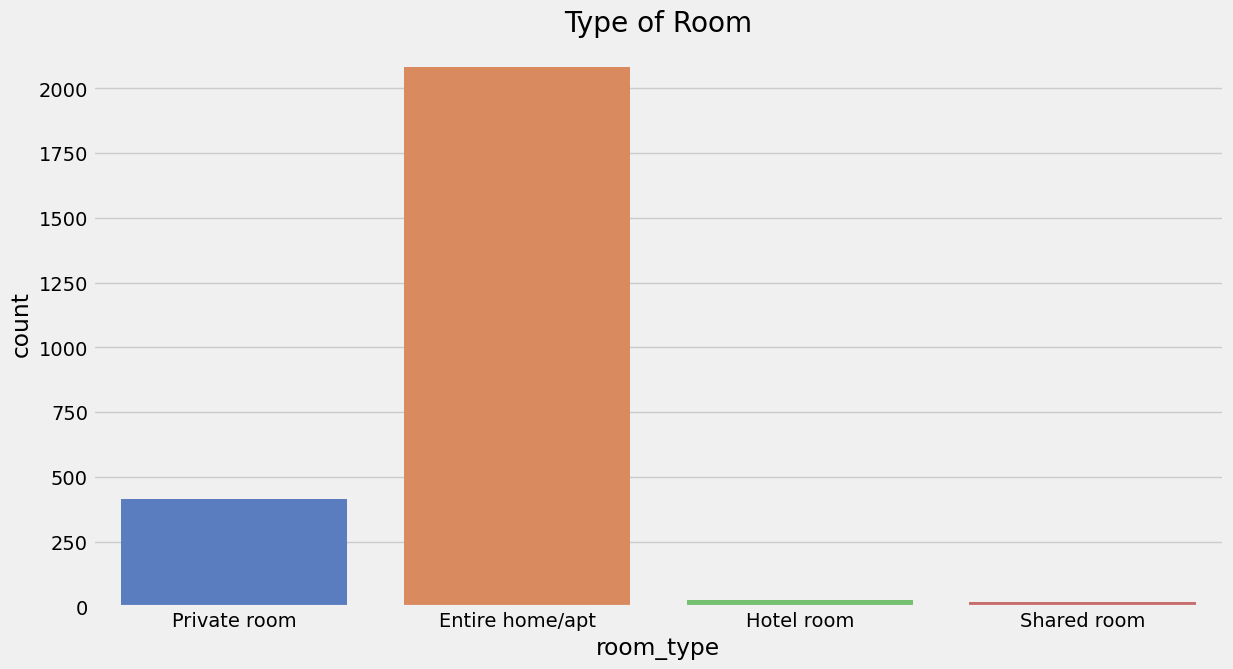

In [9]:
# #Room type
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(qc.room_type, palette="muted")
fig = plt.gcf()
plt.show()

/Users/vmcolon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


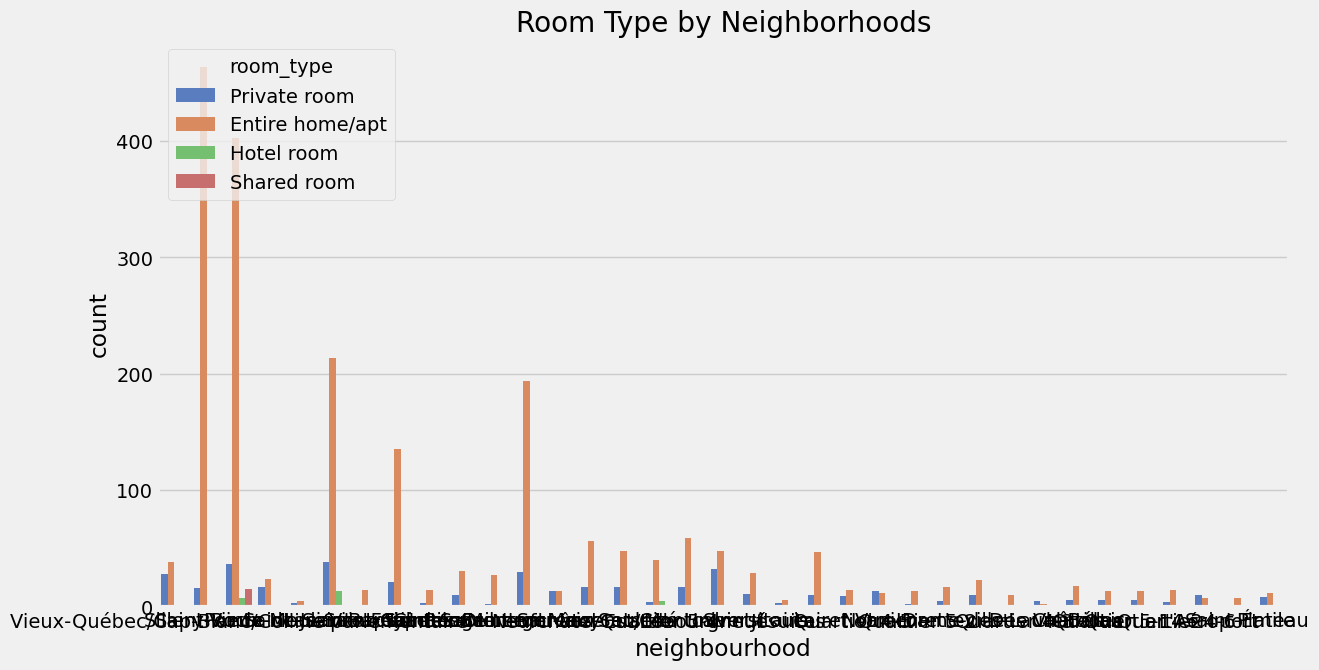

In [10]:
# # Romm Type by Neighborhoods
plt.figure(figsize=(13,7))
plt.title("Room Type by Neighborhoods")
sns.countplot(qc.neighbourhood,hue=qc.room_type, palette="muted")
plt.show()


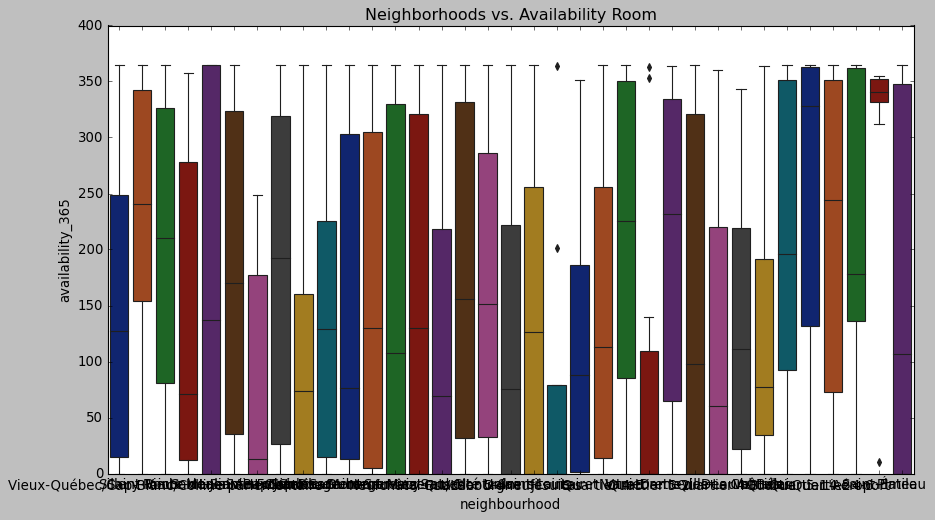

In [11]:

# #Neighborhood vs. Availability
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighborhoods vs. Availability Room")
sns.boxplot(data=qc, x='neighbourhood',y='availability_365',palette="dark")
plt.show()

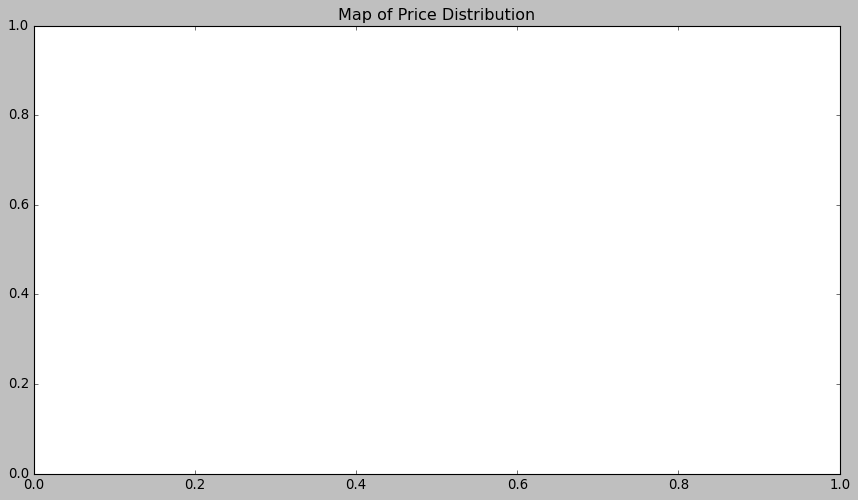

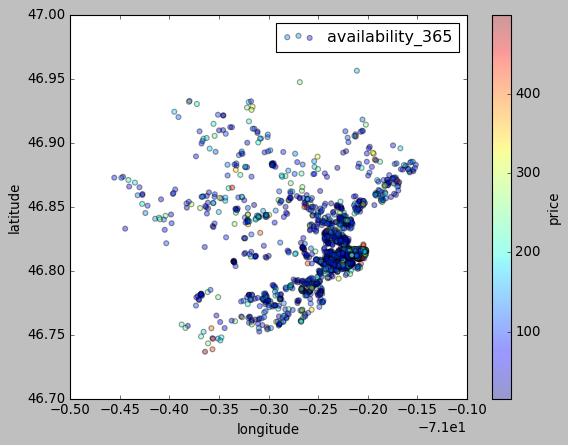

In [12]:

# #Neighborhood vs. Price Distribution
# #Price Varies vs. Area
plt.figure(figsize=(13,7))
plt.title("Map of Price Distribution")
ax=qc[qc.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()



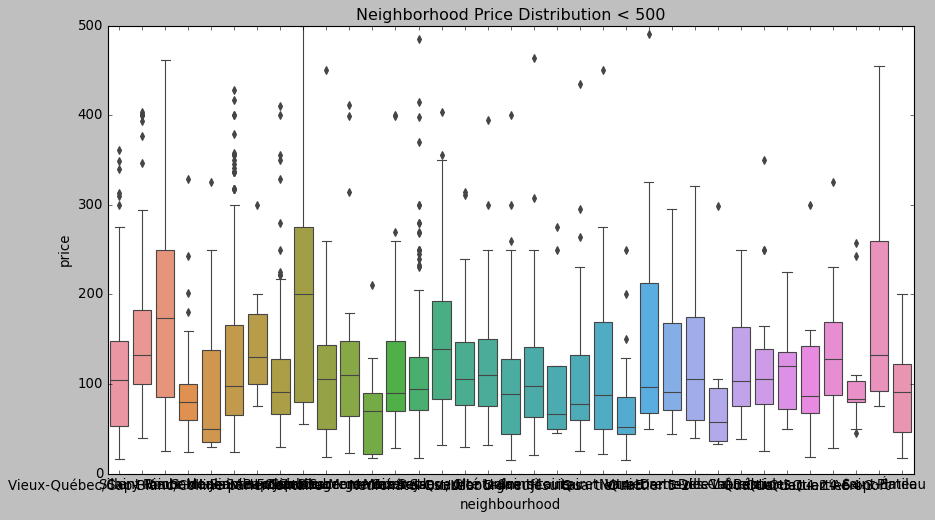

In [13]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighborhood Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood' ,data = qc[qc.price<500])
plt.show()

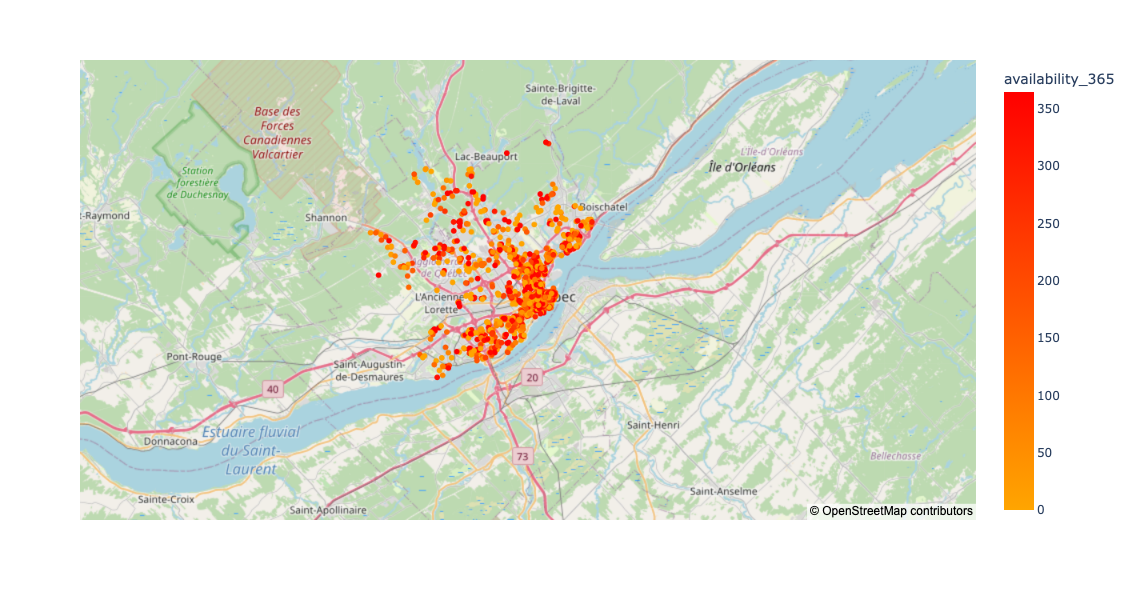

In [14]:
import plotly.express as px
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(qc,
                        lat="latitude",
                        lon="longitude",
                        hover_data=["neighbourhood", "price"],
                        color="availability_365",
                        color_continuous_scale=color_scale,
                        zoom=9,
                        height=600,
                        width=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

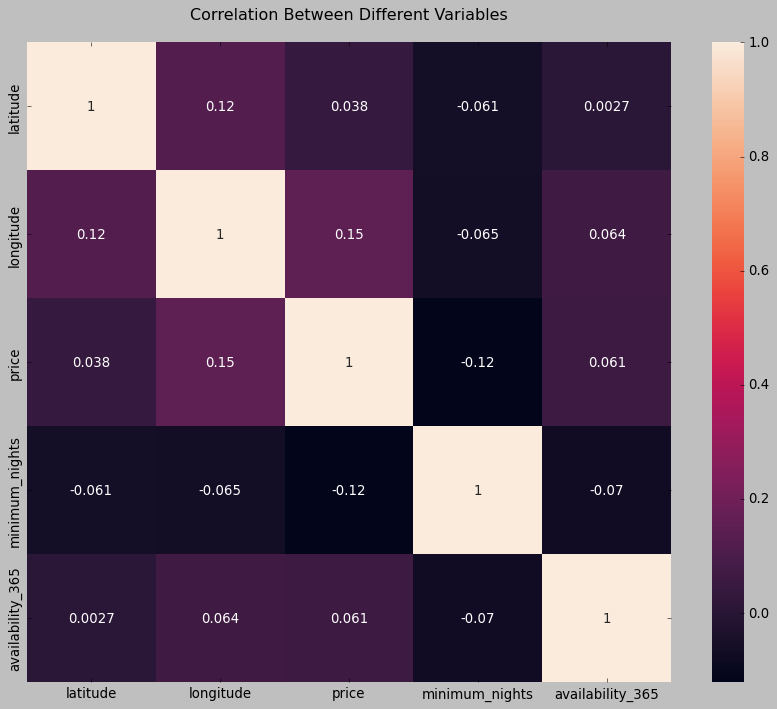

In [15]:
# #correlation
corr = qc.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

In [16]:
#prediction
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing

In [17]:
import warnings 
warnings.filterwarnings('ignore')

In [18]:
#encode label with value between 0 and n_classes-1
encode = preprocessing.LabelEncoder()
#fit label encoder
encode.fit(qc.neighbourhood)
qc.neighbourhood=encode.transform(qc.neighbourhood)

In [19]:
# Transform labels to normalized encoding
encode = preprocessing.LabelEncoder()
encode.fit(qc.neighbourhood)
qc.neighbourhood=encode.transform(qc.neighbourhood)

In [20]:
encode = preprocessing.LabelEncoder()
encode.fit(qc.room_type)
qc.room_type=encode.transform(qc.room_type)

In [21]:
qc.sort_values(by='price',ascending=True,inplace=True)


In [22]:
print(qc.head(20))

      neighbourhood   latitude  longitude  room_type  price  minimum_nights  \
2414             31  46.816670 -71.264150          2     15               7   
262               2  46.784010 -71.263540          2     15              31   
2035             29  46.783100 -71.262500          2     16              31   
492              14  46.781330 -71.319870          2     17              10   
375              27  46.809070 -71.239170          2     17               2   
26                4  46.808020 -71.334860          2     17              31   
315               4  46.806590 -71.334680          2     17              31   
1807              4  46.806750 -71.334550          2     18              31   
40               26  46.791810 -71.248520          2     18              30   
2122             26  46.791630 -71.248980          2     18              30   
1373             19  46.849900 -71.252870          2     18              32   
1021              4  46.807556 -71.335472          2

In [23]:
#Train linier regression model

In [24]:
l_reg = LinearRegression()

X = qc[['host_id','neighbourhood','latitude','longitude','room_type','minimum_nights','availability_365']]
y = qc['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

l_reg.fit(X_train,y_train)

KeyError: "['host_id'] not in index"

In [25]:
#prediction

In [26]:
predicts = l_reg.predict(X_test)

NameError: name 'X_test' is not defined

In [27]:
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

NameError: name 'y_test' is not defined

In [ ]:
#Actual Vs Predicted for Linear Regression

In [ ]:
lr_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values': predicts.flatten()}).head(20)

print(lr_pred_df.head(5))

In [ ]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()